In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import sqlite3


In [59]:
# create connection to database

con = sqlite3.connect("db/movies.db")
sql = f"""
   SELECT * FROM movie_data
   """

# bring in db to pandas dataframe
movies = pd.read_sql(sql, con)
movies.head(15)

DatabaseError: Execution failed on sql '
   SELECT * FROM movie_data
   ': no such table: movie_data

# Testing models:
## Prepping the data to be tested by the QDA model

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import MinMaxScaler

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve, average_precision_score, auc


In [5]:
# review columns
for col in movies.columns.sort_values().values:
    print(col)

actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
rel_mon_01
rel_mon_02
rel_mon_03
rel_mon_04
rel_mon_05
rel_mon_06
rel_mon_07
rel_mon_08
rel_mon_09
rel_mon_10
rel_mon_11
rel_mon_12
release_date
release_month
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


## Make dummy variables for release month

In [6]:
movies_df = pd.get_dummies(movies, columns=["release_month"], prefix=['rel_mon'])
movies_df.head(15)
# new column names for dummy variables are rel_mon_01 for Jan, rel_mon_02 for Feb, etc.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,rel_mon_03,rel_mon_04,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,1
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,0,0,0,0,0,0,0,0,0,1
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,1,0,0,0,0,0,0,0,0,0
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
5,Color,Michael Patrick King,221.0,146.0,127.0,722.0,Liza Minnelli,962.0,95328937.0,Comedy|Drama|Romance,...,0,0,1,0,0,0,0,0,0,0
6,Color,David R. Ellis,231.0,90.0,160.0,852.0,Joel David Moore,963.0,18860403.0,Horror|Thriller,...,0,0,0,0,0,0,1,0,0,0
7,Color,Peter Hyams,174.0,121.0,0.0,595.0,Mark Margolis,1000.0,66862068.0,Action|Fantasy|Horror|Mystery,...,0,0,0,0,0,0,0,0,1,0
8,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,...,0,0,0,0,0,1,0,0,0,0
9,Color,Stephen Norrington,184.0,110.0,45.0,595.0,Traci Lords,886.0,70001065.0,Action|Horror,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# converting release month dummy variables from unt8 to int64 (repeated for all 12 columns by copy/paste)
movies_df['rel_mon_12'] = movies_df['rel_mon_12'].astype(int)
movies_df.head()
movies_df.dtypes


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [8]:
# review columns in movies_df; note that release_month is missing as it was converted to dummy variables
for col in movies_df.columns.sort_values().values:
    print(col)

actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
rel_mon_01
rel_mon_01
rel_mon_02
rel_mon_02
rel_mon_03
rel_mon_03
rel_mon_04
rel_mon_04
rel_mon_05
rel_mon_05
rel_mon_06
rel_mon_06
rel_mon_07
rel_mon_07
rel_mon_08
rel_mon_08
rel_mon_09
rel_mon_09
rel_mon_10
rel_mon_10
rel_mon_11
rel_mon_11
rel_mon_12
rel_mon_12
release_date
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


In [9]:
# need to add back in release_month column into df
movies_df["release_month"] = movies["release_month"]
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,rel_mon_04,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12,release_month
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,1,12
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,0,0,0,0,0,0,0,0,1,12
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,0,0,0,0,0,0,0,0,0,03
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01


In [10]:
# review columns in movies_df; release_month is back
for col in movies_df.columns.sort_values().values:
    print(col)



actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
rel_mon_01
rel_mon_01
rel_mon_02
rel_mon_02
rel_mon_03
rel_mon_03
rel_mon_04
rel_mon_04
rel_mon_05
rel_mon_05
rel_mon_06
rel_mon_06
rel_mon_07
rel_mon_07
rel_mon_08
rel_mon_08
rel_mon_09
rel_mon_09
rel_mon_10
rel_mon_10
rel_mon_11
rel_mon_11
rel_mon_12
rel_mon_12
release_date
release_month
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


In [12]:
# #movies_df is now where I want it to be, so save it as movies again and push to sql 
# movies = movies_df
# movies.head(5)

# con = sqlite3.connect("db/movies.db")
# movies.to_sql("movie_data", con, if_exists="replace", index=False)
# # commit the changes and close the connection
# con.commit()
# con.close()

In [13]:
# # create connection to database to check that the movies_data file was re-written properly (new columns for rel_mon dummy variables and still has release_month)
# con = sqlite3.connect("db/movies.db")
# sql = f"""
#    SELECT * FROM movie_data
#    """

# # bring in db to pandas dataframe
# movieeees = pd.read_sql(sql, con)
# movieeees.head()

In [14]:
# # review columns in movieeees to double check; it's all good
# for col in movieeees.columns.sort_values().values:
#     print(col)

In [15]:
# # change movieeees back to movies

# movies = movieeees
# movies.head()

In [16]:
# create table for model purposes
# Note that I haven't included any predictors that won't be known before a movie release
movies = movies[["duration","rating_numeric", "successful","director_score","production_companies_count",
                 "total_actor_starpower","release_month","holiday_month", "rel_mon_01", 
                 "rel_mon_02", "rel_mon_03", "rel_mon_04", "rel_mon_05", "rel_mon_06", "rel_mon_07", 
                 "rel_mon_08", "rel_mon_09", "rel_mon_10", "rel_mon_11", "rel_mon_12", "tot_wins","tot_noms"]]
#movies_df = movies_df.dropna()
movies.head(10)


,duration,rating_numeric,successful,director_score,production_companies_count,total_actor_starpower,release_month,holiday_month,rel_mon_01,rel_mon_01,...,rel_mon_09,rel_mon_09,rel_mon_10,rel_mon_10,rel_mon_11,rel_mon_11,rel_mon_12,rel_mon_12,tot_wins,tot_noms
0,178.0,3,1,3.091853,4.0,5.334665,12,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,106.0,4,0,1.766773,3.0,10.933174,01,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,150.0,3,0,1.325080,5.0,11.013046,12,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,98.0,2,1,2.650160,3.0,13.698882,03,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,94.0,2,1,1.325080,3.0,6.475240,01,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,146.0,4,0,0.441693,4.0,3.409212,05,0,0,0,...,0,0,0,0,0,0,0,0,1,2
6,90.0,3,0,2.650160,1.0,2.816560,09,0,0,0,...,1,1,0,0,0,0,0,0,0,0
7,121.0,4,0,2.208466,1.0,6.499734,11,1,0,0,...,0,0,0,0,1,1,0,0,0,0
8,101.0,4,0,0.883387,8.0,3.409212,08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,110.0,4,1,0.883387,4.0,3.409212,08,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
movies["successful"].value_counts()

1    1950
0    1687
Name: successful, dtype: int64

# Set features (X) and y, create model, make train and testing data

In [18]:
# Assign X (data) and y (target)
# Change X if you want to test other parameters; this set of 9 is the final set our group decided to test

X = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]

X2 = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower", "rel_mon_01", 
             "rel_mon_02", "rel_mon_03", "rel_mon_04", "rel_mon_05", "rel_mon_06", "rel_mon_07", 
             "rel_mon_08", "rel_mon_09", "rel_mon_10", "rel_mon_11", "rel_mon_12"]]

y = movies["successful"].values.reshape(-1, 1)
print(X.shape, y.shape)
print(X2.shape, y.shape)




(3637, 8) (3637, 1)
(3637, 32) (3637, 1)


In [19]:
# split the training and testing data
# X contains the final 8 parameters; X2 contains those 8, plus 12 dummy variables for release month
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1158, train_size=0.80, stratify=y)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=1158, train_size=0.80, stratify=y)


# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X2_scaler = StandardScaler().fit(X2_train)

# Create a MinMax Scaler as an alternative
Xm_scaler = MinMaxScaler(feature_range=[0, 1])


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [20]:
pd.DataFrame(y_test)[0].value_counts()

1    390
0    338
Name: 0, dtype: int64

In [21]:
# transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

Xm_train_scaled = Xm_scaler.fit_transform(X_train)
Xm_test_scaled = Xm_scaler.fit_transform(X_test)

Xm2_train_scaled = Xm_scaler.fit_transform(X2_train)
Xm2_test_scaled = Xm_scaler.fit_transform(X2_test)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 w

# Trying the PCA analysis with QDA model (with X for 8 final parameters)

8 final parameters: 
X = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.svm import SVC

In [23]:
# define model; CHANGE FOR YOUR MODEL
# for SVC:
# modelSVC = SVC(C=5, gamma=0.1, kernel='linear')

model = QuadraticDiscriminantAnalysis()


In [24]:
# Function to test PCA with a range of component values

for n in range(2,9):
    
    pca = decomposition.PCA(n_components = n)
    pca.fit(X_train_scaled, y_train)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    model.fit(X_train_pca, y_train)
    print("n="+str(n),model.score(X_test_pca, y_test),"")

n=2 0.5302197802197802 
n=3 0.5357142857142857 
n=4 0.5412087912087912 
n=5 0.5563186813186813 
n=6 0.5576923076923077 
n=7 0.5631868131868132 
n=8 0.5604395604395604 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [25]:
# Function to test PCA with 8 features, but this time with the MaxMin scaler (Xm)

for n in range(2,9):
    
    pca = decomposition.PCA(n_components = n)
    pca.fit(Xm_train_scaled, y_train)
    Xm_train_pca = pca.transform(Xm_train_scaled)
    Xm_test_pca = pca.transform(Xm_test_scaled)
    
    model.fit(Xm_train_pca, y_train)
    print("n="+str(n),model.score(Xm_test_pca, y_test),"")


n=2 0.5357142857142857 
n=3 0.5274725274725275 
n=4 0.5494505494505495 
n=5 0.5686813186813187 
n=6 0.5782967032967034 
n=7 0.5755494505494505 
n=8 0.5837912087912088 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [26]:
pca

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_

array([0.14797809, 0.03923514, 0.030461  , 0.0223891 , 0.00761436,
       0.00591483, 0.0049356 , 0.00073159])

In [28]:
pca.explained_variance_ratio_

# WITH STADARD SCALER
# array([0.29277312, 0.15479833, 0.13686132, 0.12188198, 0.10441453,
#       0.08916134, 0.07772851, 0.02238088])

# with MinMax Scaler
# array([0.57077163, 0.15133529, 0.11749221, 0.0863578 , 0.02936961,
#        0.02281432, 0.0190373 , 0.00282185])

array([0.57077163, 0.15133529, 0.11749221, 0.0863578 , 0.02936961,
       0.02281432, 0.0190373 , 0.00282185])

In [29]:
X_train_scaled

array([[-0.04891249,  0.86840406,  0.59554403, ..., -0.35104606,
         0.46143871,  0.32595804],
       [ 0.39352046,  0.86840406, -0.60204865, ..., -0.35104606,
        -0.44615102,  0.12671206],
       [-0.49134544, -0.24005904, -0.84156719, ..., -0.35104606,
        -0.44615102, -0.80268005],
       ...,
       [ 0.34927716,  0.86840406, -0.12301158, ..., -0.35104606,
        -0.44615102,  0.82302606],
       [-0.75680521,  0.86840406, -0.12301158, ..., -0.35104606,
         0.00764385, -0.59627092],
       [-0.57983203,  0.86840406, -0.84156719, ..., -0.35104606,
        -0.44615102,  1.02943519]])

In [30]:
import numpy as np

In [31]:
i =np.identity(len(X_train_scaled[0]))
i

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [32]:
pd.DataFrame(pca.transform(i))

,0,1,2,3,4,5,6,7
0,-0.138401,-0.399766,0.493377,-0.050714,0.083028,0.244826,0.763405,0.014095
1,-0.221278,-0.053869,-0.412216,-0.019734,-0.161966,-0.026023,-0.195120,-0.002552
2,-0.118120,0.107816,0.814677,-0.690774,-0.204856,-0.061893,-0.262031,-0.009758
3,-0.185997,-0.469822,0.489846,0.007272,0.815099,-0.198352,-0.357796,0.019317
4,0.815625,-0.584317,0.389030,-0.013756,-0.145655,-0.058453,-0.184738,-0.002383
5,-0.153784,-0.405986,0.544045,0.137137,-0.103564,0.675777,-0.407237,0.623137
6,-0.157780,-0.421434,0.532286,0.126194,-0.081861,0.532479,-0.342363,-0.781951
7,-0.121640,0.056239,0.763875,0.693150,-0.235473,-0.298548,-0.113276,0.010996


In [33]:
# These column names are equivalent to rows 0-9 in pca.transform above
X.columns

Index(['duration', 'rating_numeric', 'director_score',
       'production_companies_count', 'holiday_month', 'tot_wins', 'tot_noms',
       'total_actor_starpower'],
      dtype='object')

#### Analysis on the PCA with 8 features, using MinMax scaler

In [34]:
Xm_train_scaled

array([[0.24573379, 0.8       , 0.25      , ..., 0.        , 0.05405405,
        0.22155722],
       [0.27986348, 0.8       , 0.04166667, ..., 0.        , 0.        ,
        0.18831306],
       [0.2116041 , 0.6       , 0.        , ..., 0.        , 0.        ,
        0.03324416],
       ...,
       [0.27645051, 0.8       , 0.125     , ..., 0.        , 0.        ,
        0.30449293],
       [0.19112628, 0.8       , 0.125     , ..., 0.        , 0.02702703,
        0.06768348],
       [0.20477816, 0.8       , 0.        , ..., 0.        , 0.        ,
        0.33893225]])

In [35]:
i =np.identity(len(Xm_train_scaled[0]))
i

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [36]:
pd.DataFrame(pca.transform(i))

,0,1,2,3,4,5,6,7
0,-0.138401,-0.399766,0.493377,-0.050714,0.083028,0.244826,0.763405,0.014095
1,-0.221278,-0.053869,-0.412216,-0.019734,-0.161966,-0.026023,-0.195120,-0.002552
2,-0.118120,0.107816,0.814677,-0.690774,-0.204856,-0.061893,-0.262031,-0.009758
3,-0.185997,-0.469822,0.489846,0.007272,0.815099,-0.198352,-0.357796,0.019317
4,0.815625,-0.584317,0.389030,-0.013756,-0.145655,-0.058453,-0.184738,-0.002383
5,-0.153784,-0.405986,0.544045,0.137137,-0.103564,0.675777,-0.407237,0.623137
6,-0.157780,-0.421434,0.532286,0.126194,-0.081861,0.532479,-0.342363,-0.781951
7,-0.121640,0.056239,0.763875,0.693150,-0.235473,-0.298548,-0.113276,0.010996


In [37]:
# These column names are equivalent to rows 0-9 in pca.transform above
X.columns

Index(['duration', 'rating_numeric', 'director_score',
       'production_companies_count', 'holiday_month', 'tot_wins', 'tot_noms',
       'total_actor_starpower'],
      dtype='object')

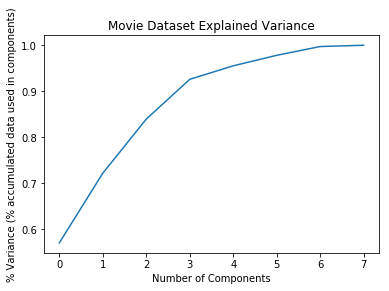

<Figure size 432x288 with 0 Axes>

In [38]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('% Variance (% accumulated data used in components)') #for each component
plt.title('Movie Dataset Explained Variance')
plt.show()
plt.savefig("movie_pca_variance.png")

# Trying the PCA analysis with QDA model (with X for 20 final parameters)

20 final parameters (the final 8, plus 12 dummy variables for release month): 
X2 = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower", "rel_mon_01", 
             "rel_mon_02", "rel_mon_03", "rel_mon_04", "rel_mon_05", "rel_mon_06", "rel_mon_07", 
             "rel_mon_08", "rel_mon_09", "rel_mon_10", "rel_mon_11", "rel_mon_12"]]


In [39]:
# Function to test PCA with 20 features
for n in range(2,10):
    
    pca2 = decomposition.PCA(n_components = n)
    pca2.fit(X2_train_scaled, y_train)
    X2_train_pca = pca2.transform(X2_train_scaled)
    X2_test_pca = pca2.transform(X2_test_scaled)
    
    model.fit(X2_train_pca, y_train)
    print("n="+str(n),model.score(X2_test_pca, y_test),"")

n=2 0.5370879120879121 
n=3 0.5398351648351648 
n=4 0.5521978021978022 
n=5 0.554945054945055 
n=6 0.5357142857142857 
n=7 0.5398351648351648 
n=8 0.5192307692307693 
n=9 0.5288461538461539 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [40]:
# Function to test PCA with 20 features, using MinMAx scaler

for n in range(2,10):
    
    pca2 = decomposition.PCA(n_components = n)
    pca2.fit(Xm2_train_scaled, y_train)
    Xm2_train_pca = pca2.transform(Xm2_train_scaled)
    Xm2_test_pca = pca2.transform(Xm2_test_scaled)
    
    model.fit(Xm2_train_pca, y_train)
    print("n="+str(n),model.score(Xm2_test_pca, y_test),"")

n=2 0.5412087912087912 
n=3 0.554945054945055 
n=4 0.5357142857142857 
n=5 0.5357142857142857 
n=6 0.5357142857142857 
n=7 0.5164835164835165 
n=8 0.5288461538461539 
n=9 0.5357142857142857 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [41]:
pca2.explained_variance_

array([0.33804703, 0.23441182, 0.18108637, 0.17345541, 0.16634818,
       0.16299602, 0.15556729, 0.1484705 , 0.14693243])

In [42]:
pca2.explained_variance_ratio_

array([0.162007  , 0.11234045, 0.08678455, 0.08312746, 0.07972136,
       0.07811486, 0.07455468, 0.07115359, 0.07041648])

In [43]:
X2_train_scaled

array([[-0.04891249,  0.86840406,  0.59554403, ..., -0.27893834,
        -0.34474071, -0.34474071],
       [ 0.39352046,  0.86840406, -0.60204865, ..., -0.27893834,
        -0.34474071, -0.34474071],
       [-0.49134544, -0.24005904, -0.84156719, ..., -0.27893834,
        -0.34474071, -0.34474071],
       ...,
       [ 0.34927716,  0.86840406, -0.12301158, ..., -0.27893834,
        -0.34474071, -0.34474071],
       [-0.75680521,  0.86840406, -0.12301158, ..., -0.27893834,
        -0.34474071, -0.34474071],
       [-0.57983203,  0.86840406, -0.84156719, ..., -0.27893834,
        -0.34474071, -0.34474071]])

In [44]:
i =np.identity(len(X2_train_scaled[0]))
i

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
pd.DataFrame(pca2.transform(i))

,0,1,2,3,4,5,6,7,8
0,-0.093528,-0.094996,-0.013287,-0.059591,-0.002789,-0.000488,-0.015423,-0.003206,-0.010184
1,-0.147730,-0.066626,-0.015948,-0.007400,0.006105,-0.029410,-0.036336,-0.000697,0.017086
2,-0.081794,-0.119648,-0.015914,-0.070190,-0.018955,0.017270,0.005530,-0.020949,-0.023996
3,-0.123417,-0.102010,-0.021495,-0.057292,-0.000592,-0.016897,-0.024556,-0.010397,-0.006049
4,0.522537,-0.008579,-0.013217,-0.052133,0.176447,0.029107,0.014742,0.006789,-0.003447
5,-0.104073,-0.099946,-0.007357,-0.057066,0.002459,-0.004564,-0.013911,-0.005458,-0.005951
6,-0.106300,-0.099403,-0.008806,-0.054027,0.000142,-0.003388,-0.015225,-0.007405,-0.007564
7,-0.087387,-0.096727,-0.002373,-0.064663,0.000289,0.007842,-0.023971,-0.001773,-0.011575
8,-0.158508,-0.153064,-0.036220,-0.098313,0.006317,-0.042207,-0.094832,-0.016598,0.019326
9,-0.158508,-0.153064,-0.036220,-0.098313,0.006317,-0.042207,-0.094832,-0.016598,0.019326


In [46]:
# These column names are equivalent to rows 0-9 in pca.transform above
X2.columns

Index(['duration', 'rating_numeric', 'director_score',
       'production_companies_count', 'holiday_month', 'tot_wins', 'tot_noms',
       'total_actor_starpower', 'rel_mon_01', 'rel_mon_01', 'rel_mon_02',
       'rel_mon_02', 'rel_mon_03', 'rel_mon_03', 'rel_mon_04', 'rel_mon_04',
       'rel_mon_05', 'rel_mon_05', 'rel_mon_06', 'rel_mon_06', 'rel_mon_07',
       'rel_mon_07', 'rel_mon_08', 'rel_mon_08', 'rel_mon_09', 'rel_mon_09',
       'rel_mon_10', 'rel_mon_10', 'rel_mon_11', 'rel_mon_11', 'rel_mon_12',
       'rel_mon_12'],
      dtype='object')

# Current best QDA model:
## With PCA on the final 8 parameters and n=8 prinicipal components
## Gives test score of 0.583


In [47]:
# Function to test PCA with 8 features, but this time with the MaxMin scaler (Xm)
    
pca = decomposition.PCA(n_components = 8)
pca.fit(Xm_train_scaled, y_train)
Xm_train_pca = pca.transform(Xm_train_scaled)
Xm_test_pca = pca.transform(Xm_test_scaled)

model.fit(Xm_train_pca, y_train)
print("n="+str(n),model.score(Xm_test_pca, y_test),"")


n=9 0.5837912087912088 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# Use our model to predict a value
predicted = model.predict(X_test_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
testing_score = model.score(Xm_test_pca,y_test)

print(f"mean squared error: {mse}")
print(f"r2: {r2}")
print(f"testing_score: {testing_score}")

mean squared error: 0.5274725274725275
r2: -1.1207100591715977
testing_score: 0.5837912087912088


In [49]:
#to get false positives and false negative rates, use confusion matrix
# output says it's easier to correctly identify women
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[306,  32],
       [352,  38]])

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print(f"true negative: {tn:3d} false positive: {fp:3d}")
print(f"false negative: {fn:3d} true positive: {tp:3d}")

# Terrible! 
# true negative: 306 false positive:  32
# false negative: 352 true positive:  38

true negative: 306 false positive:  32
false negative: 352 true positive:  38


In [51]:
print(f"tn: {tn:3d} fp: {fp:3d}")
print(f"fn: {fn:3d} tp: {tp:3d}")

tn: 306 fp:  32
fn: 352 tp:  38


In [52]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
>>> (tn, fp, fn, tp)
(0, 2, 1, 1)

Thus in binary classification, 
the count of true negatives is 00 , false negatives is 01, true positives is 11 and false positives is 01.

SyntaxError: invalid syntax (<ipython-input-52-8501c192ac24>, line 5)

## Getting Data to Predict a Future Movie

In [56]:
movies.head()


,duration,rating_numeric,successful,director_score,production_companies_count,total_actor_starpower,release_month,holiday_month,rel_mon_01,rel_mon_01,...,rel_mon_09,rel_mon_09,rel_mon_10,rel_mon_10,rel_mon_11,rel_mon_11,rel_mon_12,rel_mon_12,tot_wins,tot_noms
0,178.0,3,1,3.091853,4.0,5.334665,12,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,106.0,4,0,1.766773,3.0,10.933174,01,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,150.0,3,0,1.325080,5.0,11.013046,12,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,98.0,2,1,2.650160,3.0,13.698882,03,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,94.0,2,1,1.325080,3.0,6.475240,01,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# create connection to database

con = sqlite3.connect("db/movies.db")
sql = f"""
   SELECT * FROM movie_data
   """

# bring in db to pandas dataframe
movies = pd.read_sql(sql, con)
movieeees.head(15)

DatabaseError: Execution failed on sql '
   SELECT * FROM movie_data
   ': no such table: movie_data

In [54]:
for col in movieeees.columns.sort_values().values:
    print(col)

NameError: name 'movieeees' is not defined

In [55]:
# Predict outcome for movie "Once Upon a Time in Hollywood"
# are the top three actors present in our data set and can I get their actor scores?
# Brad Pitt, Leonardo DiCaprio, and Margot Robbie

# make a new df with all the times Brad Pitt is actor_1_name; 17 times
pitt_1 = movieeees[movieeees["actor_1_name"].str.contains("Brad Pitt", regex = False)]
# make a smaller df so it is easier to get data I need
pitt_1_df = pitt_1[["actor_1_name", 'actor_1_score', 'duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]
pitt_1_df

# repeat for Leo
leo_1 = movieeees[movieeees["actor_1_name"].str.contains("Leonardo DiCaprio", regex = False)]
leo_1_df = leo_1[["actor_1_name", 'actor_1_score', 'duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]
leo_1_df


# repeat for Margot Robbie; she isn't represented in data as actor 1, 2, or 3
margot_1 = movieeees[movieeees["actor_3_name"].str.contains("Margot Robbie", regex = False)]
margot_1_df = margot_1[["actor_3_name", 'actor_3_score', 'duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]
margot_1_df 

# repeat for Quentin Tarantino, director
tarantino_1 = movieeees[movieeees["director_name"].str.contains("Quentin Tarantino", regex = False)]
tarantino_1_df = tarantino_1[["director_name", 'director_score', 'duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]
tarantino_1_df



NameError: name 'movieeees' is not defined

In [ ]:
# create connection to database and pull in oscar dataset
con = sqlite3.connect("db/movies.db")
sql = f"""
   SELECT * FROM oscars
   """

# bring in db to pandas dataframe
oscars = pd.read_sql(sql, con)
oscars.head()

In [ ]:
# change index to entity in oscars, so we can count by name
oscars2 = oscars
oscars2 = oscars.set_index("entity")
release_year = 2019

# pull oscar info for each actor and director
pitt_df = oscars[oscars["entity"] == "Brad Pitt"] 
pitt_nods = len(pitt_df[(pitt_df['year'] < release_year)]) 
pitt_wins = len(pitt_df[(pitt_df['year'] < release_year) & (pitt_df['winner'] == True)])
print(f"Brad Pitt has {pitt_nods} Oscar nominations and {pitt_wins} wins. ")

leo_df = oscars[oscars["entity"] == "Leonardo DiCaprio"] 
leo_nods = len(leo_df[(leo_df['year'] < release_year)]) 
leo_wins = len(leo_df[(leo_df['year'] < release_year) & (leo_df['winner'] == True)])
print(f"Leonardo DiCaprio has {leo_nods} Oscar nominations and {leo_wins} wins. ")

marg_df = oscars[oscars["entity"] == "Margot Robbie"] 
marg_nods = len(marg_df[(marg_df['year'] < release_year)]) 
marg_wins = len(marg_df[(marg_df['year'] < release_year) & (marg_df['winner'] == True)])
print(f"Margot Robbie has {marg_nods} Oscar nominations and {marg_wins} wins. ")

quent_df = oscars[oscars["entity"] == "Quentin Tarantino"] 
quent_nods = len(quent_df[(quent_df['year'] < release_year)]) 
quent_wins = len(quent_df[(quent_df['year'] < release_year) & (quent_df['winner'] == True)])
print(f"Quentin Tarantino has {quent_nods} Oscar nominations and {quent_wins} wins. ")

all_noms = pitt_nods + leo_nods + marg_nods + quent_nods
all_wins = pitt_wins + leo_wins + marg_wins + quent_wins
print(f"The top cast/director combined have {all_noms} Oscar nominations and {all_wins} wins. ")



In [ ]:
# Summary of info on movie "Once Upon a Time in Hollywood"
# duration = 159 (IMDB)
# rating_numeric = not yet known, assuming its R, 4
# director_score = 3.533546 for Tarantino
# production_companies_count = 4 (wikipedia)
# holiday_month = 1 (yes, released July 26)
# tot_wins =  1 
# tot_noms =  9 
# total_actor_starpower = 6.463259 (Pitt) + 7.984026 (DiCaprio) + 0 (Robbie) = 14.447285


In [ ]:
X.head()

In [ ]:
new_movie1 = [[159, 4, 3.533546, 4.0, 1, 1, 9, 14.447285]]
predicted_class_movie1 = model.predict(new_movie1)
print(f"Once Upon a Time in Hollywood has a predicted class of {predicted_class_movie1}")

# predicts 0 which is a failure

## Angie's notes on how QDA works:
-  https://scikit-learn.org/dev/modules/lda_qda.html (has good image to illustrate use)
-  http://uc-r.github.io/discriminant_analysis (good explanaiton of benefits and caveats)
-  QDA is great for datasets with varying "covariance"...  What does that mean?  Well, co-variance occurs when two data features have variance within themsleves, but that the variance is a similar pattern between both features.  So for example, both data sets might have a large positive covariance and be linear. Two features with varying co-variance will show different trajectories. 
-  covariance is the sum of (each x - mean of x values)x(each y - mean of y values) / sample size - 1
-  positive value shows positive covariance